# All In One Place
---
    All In One Place Co. is a multi-brand company that seeks to sell various products at a competitive price and quality assurance. Recently, the marketing team discovered in database that some customers were buying more expensive products frequently. 
    Knowing this, the All In One Place team create a plan to develop a loyalty program for customers, the idea of the Insiders was created. Even with that information, the team isn't sure which customers will be assigned to the program, so the data team was called to cooperate. 
    It is up to the data team to answer the following questions: 
   - Who are the elegible people to participate in the “Insiders Program”?
   - How many clients will be part of the group?
   - Which are the main caracteristics for the group?
   - Which is the revenues percentage that comes from the group?
   - What is the expected revenue from this group for the next months?
   - Which are the guarantees that the “Insiders Program” is better than the rest of the base?

## PLANNING

1. Identify elegible costumers for Insiders?
    - How can a costumer become eligible? What is a High-Value costumer?
        - **Revenue**:
            - High ticket
            - High LT revenue
            - Low recency
            - High bascket size
            - Low churn probability
            - High revenue forecast
            - High probabilty of pruchase

        - **Cost**:
            - Low return rate

        - **Costumer experience**:
            - High rating
    
2. How many costumers will be included into Insiders?
    - Total customers
    - Rate (%) of members to include in Insiders
        
3. Which are the main characteristics of those costumers?
    - Describe the customers attributes:
        - Age
        - Localization
     
    - Consumption behavior:
        - Same attributes for clustering
        
4. Which is the revenue of Insiders?
    - Total revenue
    - Revenue of Insiders members

5. Which is the revenue forecast for next months of Insiders?
    - LT revenue of Insiders members
    - Cohort analysis

6. What are the conditions to be included in Insiders?
    - Define the period of evualation (1 month, 3 months,...)
    - New members must have similar attributes of current members

7. What are the conditions to be removed in Insiders?
    - Define the period of evualation (1 month, 3 months,...)
    - Members to be removed must have different attributes of group

8. How can we garantee the Insiders program is better than others costumers?
    - A/B Test
    - A/B Bayesian
    - Hypothesis test

9. How can Marketing Dept. increase the revenue?
    - Discount
    - Purchase preference
    - Free freight
    - Company tour

## IMPORTS

In [1]:
# loading packages
from IPython.core.display import HTML
from IPython.core.display import Image
import inflection
import warnings
import pickle

# data manipulation
import numpy as np
import pandas as pd
from datetime import timedelta

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import squarify

## HELPER FUNCTIONS

### Organization

In [2]:
# snakecase
def snakecase(cols):
    change_snakecase = lambda x: inflection.underscore(x)
    return list(map(change_snakecase, cols))


def change_df(data):
    return pd.DataFrame(data)


# ignoring errors
warnings.filterwarnings('ignore')

# round
pd.options.display.float_format = '{:.3f}'.format

### Graphic

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'seaborn-pastel' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


### Metric

In [4]:
def numerical_metrics(numerical_attributes):
    data_mean = pd.DataFrame(numerical_attributes.apply(np.mean)).T
    data_median = pd.DataFrame(numerical_attributes.apply(np.median)).T
    data_std = pd.DataFrame(numerical_attributes.apply(np.std)).T
    data_min = pd.DataFrame(numerical_attributes.apply(min)).T
    data_max = pd.DataFrame(numerical_attributes.apply(max)).T
    data_range = pd.DataFrame(numerical_attributes.apply(lambda x: x.max() - x.min())).T
    data_q1 = pd.DataFrame(numerical_attributes.apply(lambda x: np.quantile(x, .25) )).T
    data_q3 = pd.DataFrame(numerical_attributes.apply(lambda x: np.quantile(x, .75) )).T
    data_skew = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew())).T
    data_kurtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis())).T

    num_attributes = pd.concat([data_min,data_max,data_range,data_mean,data_median, data_q1, data_q3,data_std,data_skew,data_kurtosis]).T.reset_index()
    num_attributes.columns=['Attributes','Min','Max','Range','Mean','Median','Q1','Q3', 'St deviation','Skewness','Kurtosis']

    return num_attributes

## DATA

This dataset is avaliable in: https://www.kaggle.com/vik2012kvs/high-value-customers-identification

- **Data fields**
    - Invoice Number: Unique value from every transaction
    - Stock Code Product: Product code
    - Description: Product name
    - Quantity: The quantities of each product per transaction
    - Invoice Date: The day when the transaction was generated
    - Unit Price: Product price per unit
    - Customer ID: Unique ID to each customer
    - Country: Country name
    

In [5]:
homepath = '/home/gutto/projects/pa005_insiders_clustering/insiders_clustering/' 

In [6]:
df_raw = pd.read_csv(homepath + 'data/raw/Ecommerce.csv', low_memory = False)

In [7]:
pickle.dump(df_raw, open(homepath + 'data/processed/df_raw.pkl', 'wb'))

## 1.0 DATA DESCRIPTION

- **Tasks**
    - Dataset Checkpoint
    - Check Data
    - Rename Columns
    - Data Dimensions
    - Data Types
    - Descriptive Statistical

### 1.1 Dataset Checkpoint

In [8]:
df1 = pickle.load(open(homepath + 'data/processed/df_raw.pkl', 'rb'))

In [9]:
df1.head(10).T

,0,1,2,3,4,5,6,7,8,9
InvoiceNo,536365,536365,536365,536365,536365,536365,536365,536366,536366,536367
StockCode,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT
Quantity,6,6,8,6,6,2,6,6,6,32
InvoiceDate,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16
UnitPrice,2.55,3.39,2.75,3.39,3.39,7.65,4.25,1.85,1.85,1.69
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,13047.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Check Data

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


All the lines in the Unnamed: 8 are null, because of this, I will drop this column later on the NA step.

#### 1.2.1 Check NA

In [11]:
change_df({'Sum of NA': df1.isna().sum(), '% NA': df1.isna().sum()/df1.shape[0]})

,Sum of NA,% NA
InvoiceNo,0,0.000
StockCode,0,0.000
Description,1454,0.003
Quantity,0,0.000
InvoiceDate,0,0.000
UnitPrice,0,0.000
CustomerID,135080,0.249
Country,0,0.000
Unnamed: 8,541909,1.000


The unnamed: 8 is empty in all rows, so I will drop that

In [12]:
df1.drop(['Unnamed: 8'], axis=1, inplace=True)

In this cycle, I'll drop the rows with NA and see the impact.

In [13]:
df1 = df1.dropna(subset=['Description', 'CustomerID'])
print(f'Removed data: {1 - df1.shape[0]/df_raw.shape[0]}')

Removed data: 0.24926694334288602


In [14]:
change_df({'Sum of NA': df1.isna().sum(), '% NA': df1.isna().sum()/df1.shape[0]})

,Sum of NA,% NA
InvoiceNo,0,0.000
StockCode,0,0.000
Description,0,0.000
Quantity,0,0.000
InvoiceDate,0,0.000
UnitPrice,0,0.000
CustomerID,0,0.000
Country,0,0.000


#### 1.2.2 Unique values

In [15]:
print(f'{len(df1["InvoiceNo"].unique())} unique invoice numbers.')
print(f'{len(df1["StockCode"].unique())} diferent unique stock codes.')
print(f'{len(df1["Description"].unique())} unique products descriptions.')
print(f'{len(df1["CustomerID"].unique())} unique customers.')

22190 unique invoice numbers.
3684 diferent unique stock codes.
3896 unique products descriptions.
4372 unique customers.


#### 1.2.3 Duplicated rows

In [16]:
df1.drop_duplicates(inplace = True)

### 1.3 Organizing Columns

In [17]:
# rename columns
cols_old = df1.columns

# using the snakecase type
cols_new = snakecase(cols_old)
df1.columns = cols_new

In [18]:
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [19]:
df1 = df1[['customer_id', 'country', 'invoice_date', 'invoice_no','stock_code', 'description', 'unit_price', 'quantity']]

In [20]:
df1.head().T

,0,1,2,3,4
customer_id,17850.0,17850.0,17850.0,17850.0,17850.0
country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
invoice_date,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16
invoice_no,536365,536365,536365,536365,536365
stock_code,85123A,71053,84406B,84029G,84029E
description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
unit_price,2.55,3.39,2.75,3.39,3.39
quantity,6,6,8,6,6


### 1.4 Data Dimensions

In [21]:
print(f'Number of rows: {df1.shape[0]} \nNumber of columns: {df1.shape[1]}')

Number of rows: 401603 
Number of columns: 8


### 1.5 Data Types

In [22]:
df1.dtypes

customer_id     float64
country          object
invoice_date     object
invoice_no       object
stock_code       object
description      object
unit_price      float64
quantity          int64
dtype: object

I've found some weird values in invoice_no column, some rows has a letter, like: C536479

1. `invoice_date`: Need to be converted from object to datetime64

In [23]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

2. `invoice_no`: Need to be converted from object to int64

There are 6 numbers in the invoice_no and, sometimes, 1 letter, always before the numbers.

In [24]:
df1['invoice_number'] = df1['invoice_no'].apply(lambda x: x if len(x) == 6
                                                          else x[1:])

In [25]:
df1['invoice_letter'] = df1['invoice_no'].apply(lambda x: 'no_letter' if len(x) == 6
                                                          else x[0])

In [26]:
df1.sample(5)

,customer_id,country,invoice_date,invoice_no,stock_code,description,unit_price,quantity,invoice_number,invoice_letter
363998,13397.000,United Kingdom,2017-09-26,568594,23343,JUMBO BAG VINTAGE CHRISTMAS,2.080,10,568594,no_letter
13236,17320.000,United Kingdom,2016-12-04,537428,21912,VINTAGE SNAKES & LADDERS,3.750,3,537428,no_letter
20007,14932.000,Channel Islands,2016-12-07,538002,21587,COSY HOUR GIANT TUBE MATCHES,2.550,12,538002,no_letter
314311,13644.000,United Kingdom,2017-08-24,564630,21803,CHRISTMAS TREE STAR DECORATION,0.420,36,564630,no_letter
93160,15382.000,United Kingdom,2017-02-15,544278,22526,WHEELBARROW FOR CHILDREN,12.750,1,544278,no_letter


In [27]:
df1['invoice_number'] = df1['invoice_number'].astype(int64)

In [28]:
df1.dtypes

customer_id              float64
country                   object
invoice_date      datetime64[ns]
invoice_no                object
stock_code                object
description               object
unit_price               float64
quantity                   int64
invoice_number             int64
invoice_letter            object
dtype: object

### 1.6 Descriptive Statistics

#### 1.6.1 Numerical Attributes

- Central tendency
  - average 
  - median
---

- Dispersion 
  - standard deviation: tell us the variation, for example, if the median is 350 and the std is 100, there times that the total 350 + 100 and times that the total is 350 - 100;
  
  - min: min value of all the data;
  
  - max: max value of all the data;
  
  - range: difference between min and max;
  
  - skewness: tell us how shifted our graph is.
  
  - kurtosis: tell us how close our distribution is to a normal distribution.

In [29]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
num_attributes = num_attributes.drop(columns=['customer_id', 'invoice_number'])
num_cols = num_attributes.columns.tolist()

In [30]:
num_attributes_result = numerical_metrics(num_attributes[num_cols])
num_attributes_result

,Attributes,Min,Max,Range,Mean,Median,Q1,Q3,St deviation,Skewness,Kurtosis
0,unit_price,0.000,38970.000,38970.000,3.474,1.950,1.250,3.750,69.764,449.316,243760.343
1,quantity,-80995.000,80995.000,161990.000,12.183,5.000,2.000,12.000,250.283,0.180,93140.043


##### 1.6.1.1 Numerical Attributes Outliers

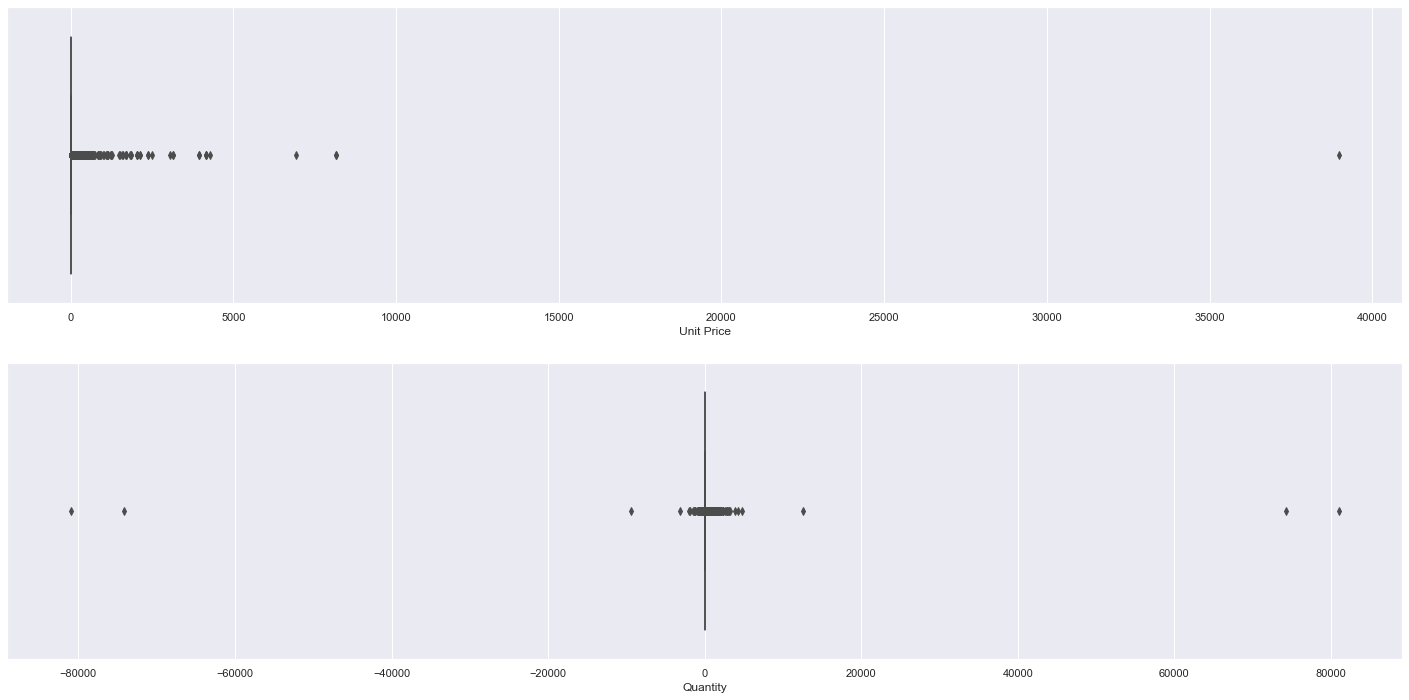

In [31]:
# creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

ax = sns.boxplot(df1['unit_price'], ax = ax1);
ax.set_xlabel('Unit Price', fontsize = 12);
ax = sns.boxplot(df1['quantity'], ax = ax2);
ax.set_xlabel('Quantity', fontsize = 12);

#saving figure
plt.savefig(homepath + 'reports/figures/num_attributes_outliers.png')

#### 1.6.2 Categorical Attributes

In [32]:
cat_attributes = df1.select_dtypes(include=['object'])
cat_attributes = cat_attributes.drop(columns=['invoice_no', 'description'])
cat_cols = cat_attributes.columns.tolist()

`country`:

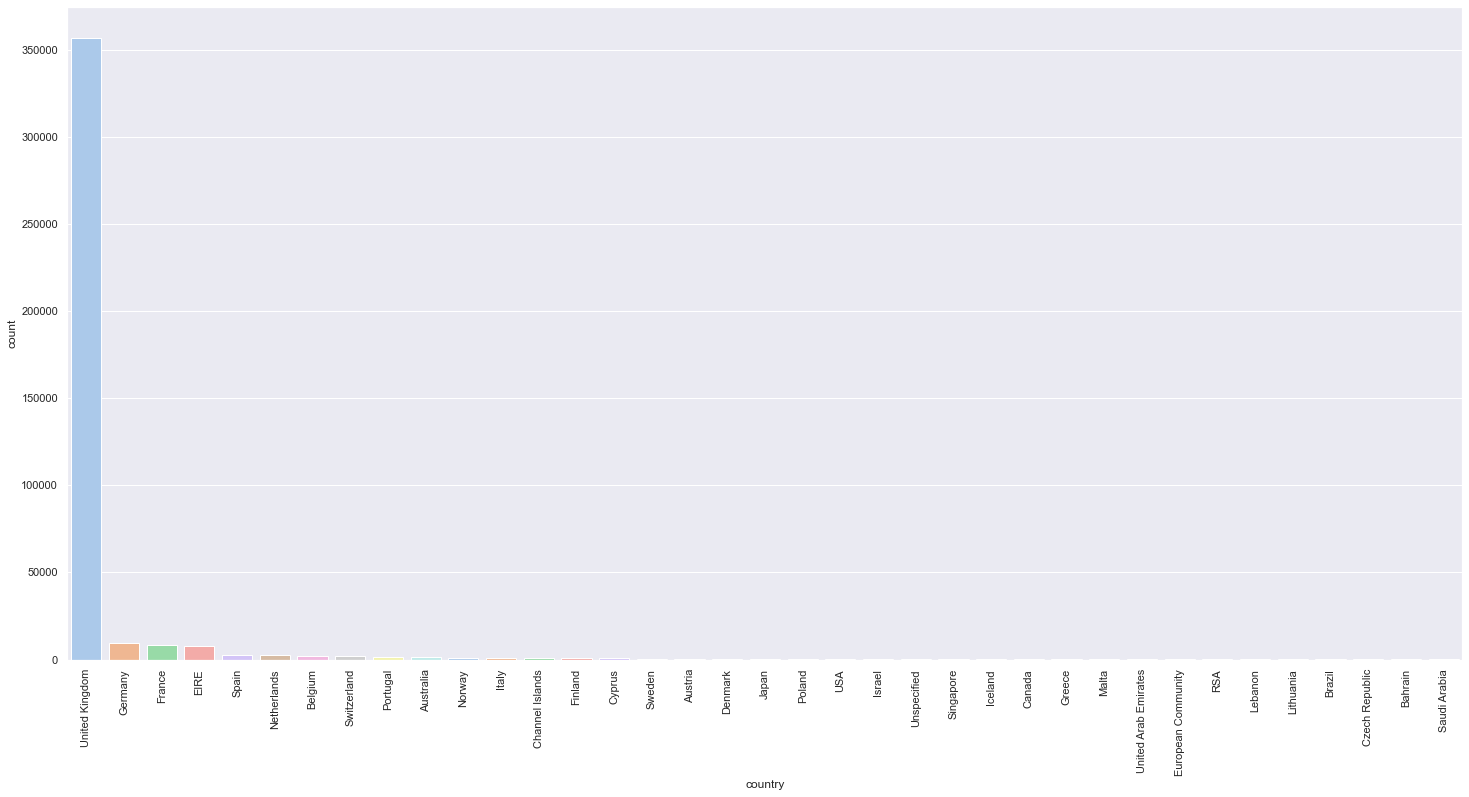

In [33]:
ax = sns.countplot(x = 'country', data = cat_attributes, palette = 'pastel', order = cat_attributes['country'].value_counts().index)
plt.xticks(rotation = 90);

# saving figure
plt.savefig(homepath + 'reports/figures/country_count_uk.png')

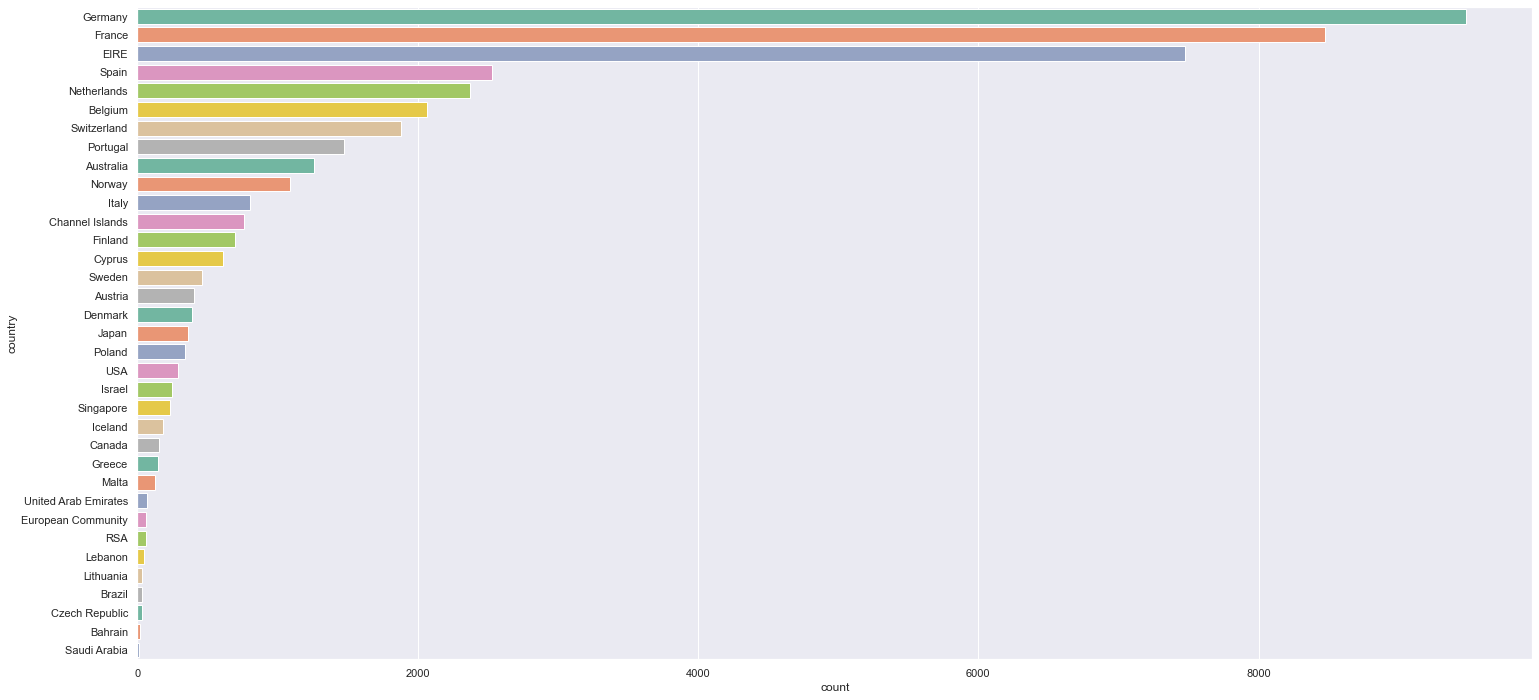

In [34]:
aux1 = cat_attributes[cat_attributes['country'] != 'United Kingdom']
aux2 = aux1[aux1['country'] != 'Unspecified']
ax = sns.countplot(y = 'country', data = aux2, palette = 'Set2', order = aux2['country'].value_counts().index)

# saving figure
plt.savefig(homepath + 'reports/figures/country_count.png')

#### 1.6.3 Date Attributes

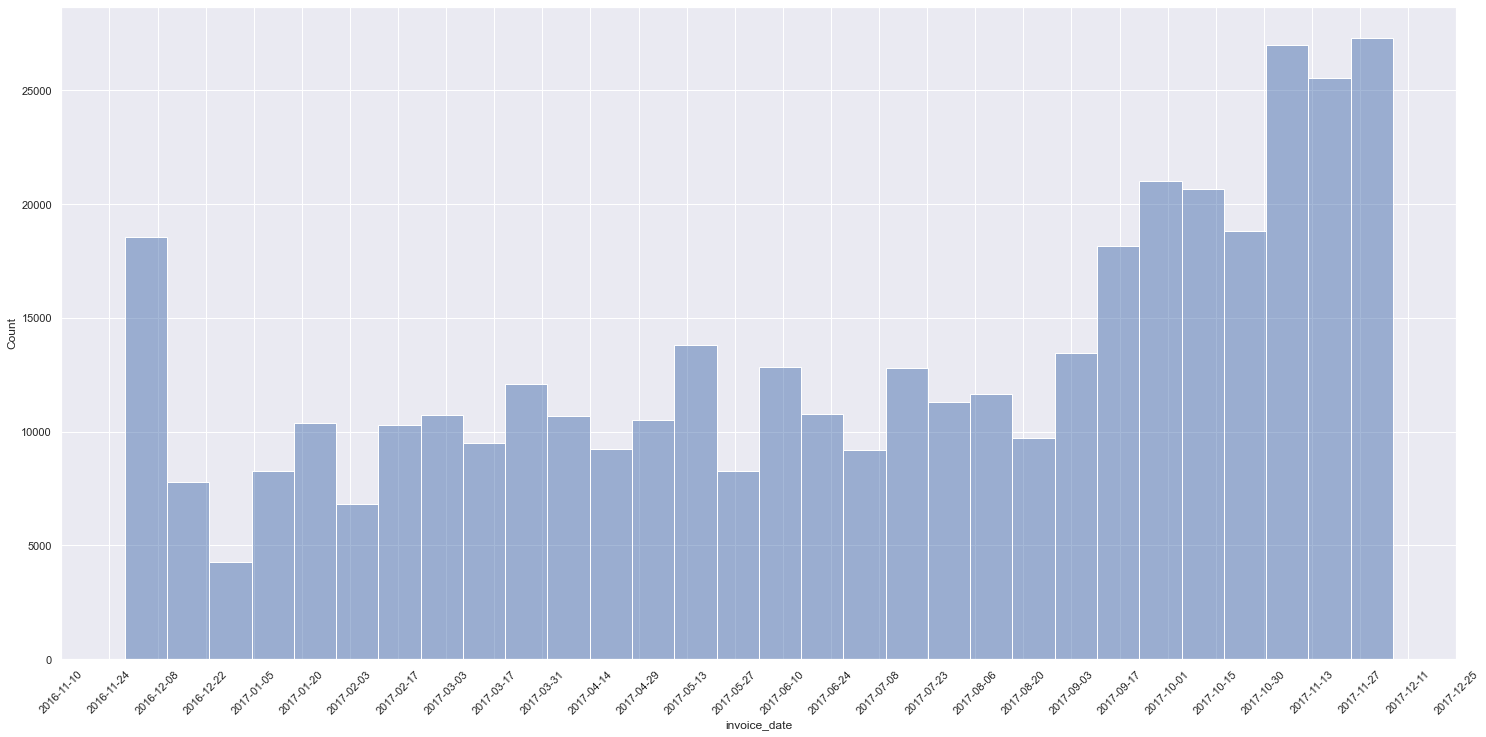

In [35]:
ax = sns.histplot(data = df1, x = 'invoice_date',bins = 30, alpha = 0.5);
plt.xticks(rotation = 45)
ax.xaxis.set_major_locator(ticker.LinearLocator(numticks = 30))

# saving figure
plt.savefig(homepath + 'reports/figures/countplot_date.png')

### 1.7 Save State

In [36]:
pickle.dump(df1, open(homepath + 'data/processed/df1.pkl', 'wb'))

## 2.0 FEATURE ENGINEERING

- **Tasks**
    - Dataset Checkpoint
    - Mind Map
    - Hypothesis
    - Feature Engineering to Validation

### 2.1 Dataset Checkpoint

In [37]:
df2 = pickle.load(open(homepath + 'data/processed/df1.pkl', 'rb'))

### 2.2 Mind Map

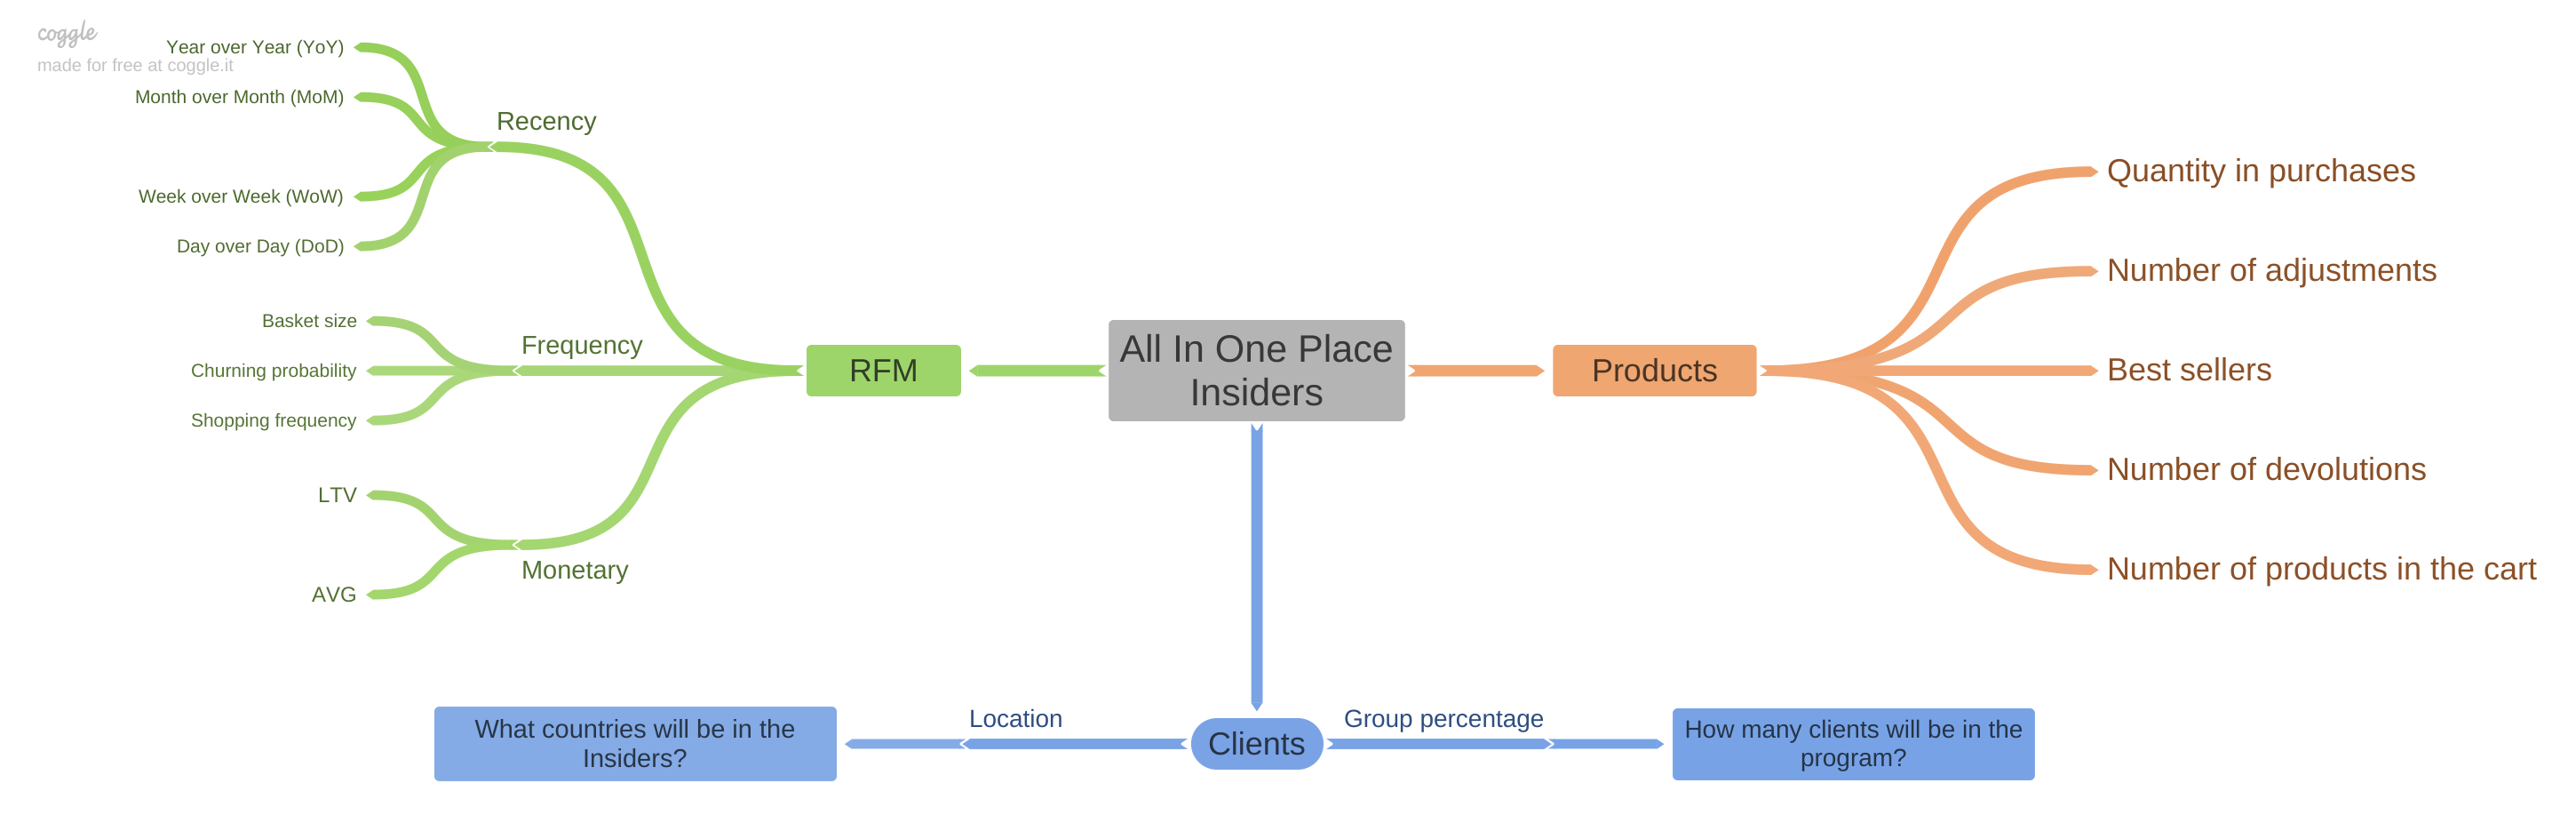

In [38]:
Image(homepath + 'reports/figures/mind_map.png')

### 2.3 Creating Features

#### 2.3.2 Creating time features

In [39]:
# year
df2['invoice_year'] = df2['invoice_date'].dt.year

# month
df2['invoice_month'] = df2['invoice_date'].dt.month

# weekday
df2['invoice_day_week'] = df2['invoice_date'].dt.dayofweek

#### 2.3.1 RFM

In [40]:
# Creating sale_price
df2['sale_price'] = df2['quantity'] * df2['unit_price']

In [41]:
# Create snapshot date
snapshot_date = df2['invoice_date'].max() + timedelta(days=1)
snapshot_date

Timestamp('2017-12-08 00:00:00')

In [42]:
df2_rfm = df2.groupby(['customer_id']).agg({
        'invoice_date': lambda x: (snapshot_date - x.max()).days,
        'invoice_number': 'count',
        'sale_price': 'sum'})

df2_rfm.rename(columns={'invoice_date': 'recency',
                         'invoice_number': 'frequency',
                         'sale_price': 'monetary'}, inplace=True)

numerical_metrics(df2_rfm).T

##### 2.3.1.1 RFM distribution

KeyError: 'recency'

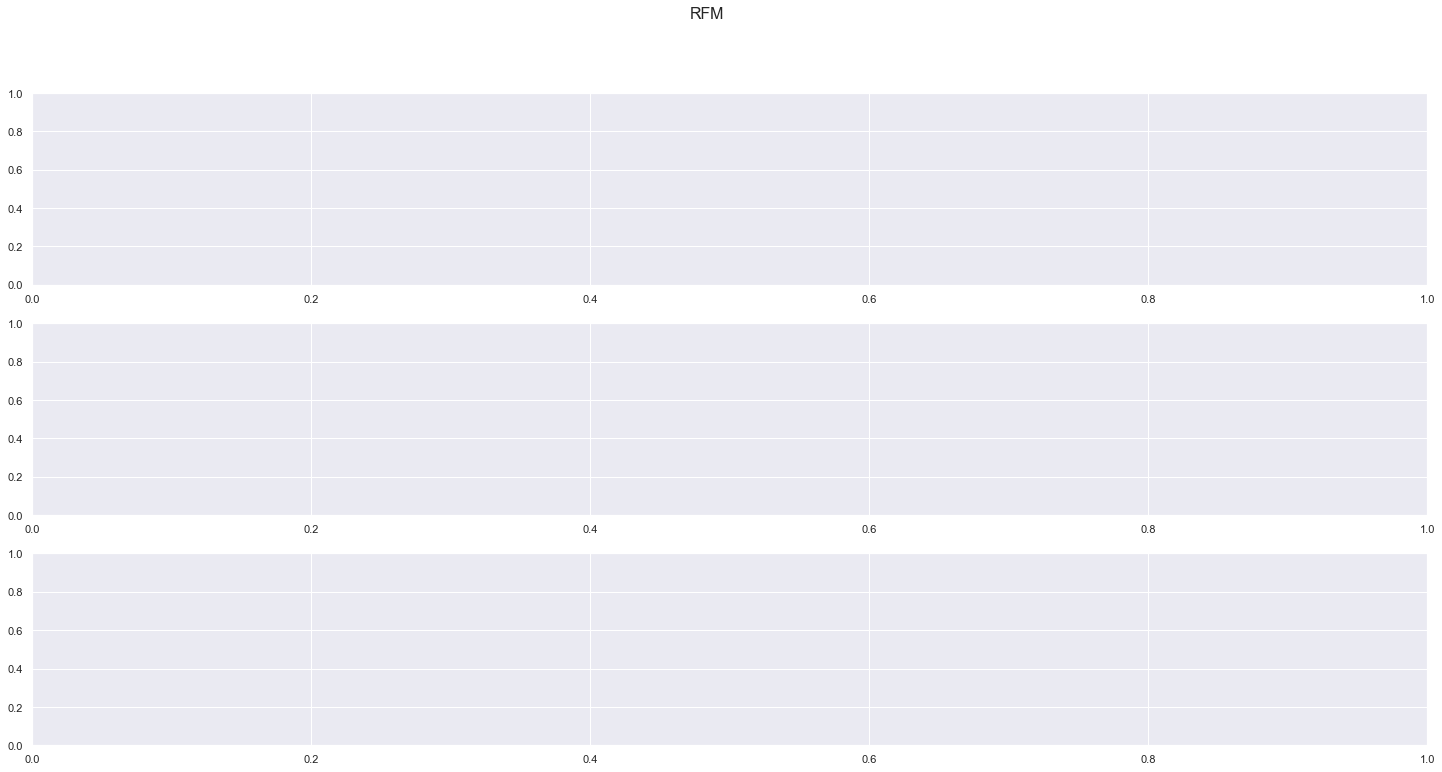

In [44]:
430	14.488	23.935	0.059	6336.697	164.053	3820.274	64.547# creating subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle('RFM', fontsize=16)

ax = sns.distplot(df2_rfm['recency'], ax = ax1)
ax = sns.distplot(df2_rfm['frequency'], ax = ax2)
ax = sns.distplot(df2_rfm['monetary'], ax = ax3)

# saving figure
plt.savefig(homepath + 'reports/figures/rfm.png')

##### 2.3.1.2 RFM score

In [ ]:
#creating a score
df2_rfm['recency_score'] = df2_rfm['recency'].apply(lambda x: 5 if x <= 30 else
                                   4 if x > 30 and x <= 60 else
                                   3 if x > 60 and x <= 90 else
                                   2 if x > 90 and x <= 120 else 1)

df2_rfm['frequency_score'] = df2_rfm['frequency'].apply(lambda x: 5 if x >= 500 else
                                   4 if x < 500 and x >= 125 else
                                   3 if x < 125 and x >= 75 else
                                   2 if x < 75 and x >= 50 else 1)

df2_rfm['monetary_score'] = df2_rfm['monetary'].apply(lambda x: 5 if x >= 8000 else
                                   4 if x < 8000 and x >= 2000 else
                                   3 if x < 2000 and x >= 1000 else
                                   2 if x < 1000 and x >= 500 else 1)
df2_rfm['rfm_score'] = (df2_rfm['recency_score'] + df2_rfm['frequency_score'] + df2_rfm['monetary_score'])/3

df2_rfm['rfm_level'] = df2_rfm['rfm_score'].apply(lambda x: 'Tier S' if x == 5 else
                                   'Champions' if x < 5 and x >= 4 else
                                   'Loyal' if x < 4 and x >= 3 else
                                   'They have potential' if x < 3 and x >= 2 else 'Need a push')

numerical_metrics(df2_rfm[['recency', 'frequency', 'monetary', 'recency_score', 'frequency_score', 'monetary_score']]).T

In [ ]:
df2_rfm.sample(5)

In [ ]:
# verifying levels
rfm_level_plt = df2_rfm.groupby('rfm_level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
})
rfm_level_plt.columns = ['recency_mean', 'frequency_mean', 'monetary_mean', 'count']
rfm_level_plt.reset_index()

##### 2.3.1.3 Treemap

In [ ]:
sizes = rfm_level_plt['count']
label = rfm_level_plt['count'].index
color = plt.cm.RdBu(np.random.rand(len(sizes)))

# treemap
rfm_level = squarify.plot(sizes = sizes, label = label, color = color,
                          pad = True, alpha = 0.7, text_kwargs = {'rotation' : 90, 'fontsize' : 25});
plt.axis('off');
plt.tight_layout();
plt.title('RFM Treemap', fontsize = 40)

# saving figure
plt.savefig(homepath + 'reports/figures/rfm_treemap.png')

###

### 2.4 Hypothesis 

### 2.5 Save State

In [ ]:
pickle.dump(df2, open(homepath + 'data/processed/df2.pkl', 'wb'))

## 3.0 VARIABLE FILTERING

### 3.1 Dataset Checkpoint

In [ ]:
df3 = pickle.load(open(homepath + 'data/processed/df2.pkl', 'rb'))

### 3. Save State

In [ ]:
pickle.dump(df3, open(homepath + 'data/processed/df3.pkl', 'wb'))

## 4.0 EXPLORATORY DATA ANALYSIS

### 4.1 Dataset Checkpoint

In [ ]:
df4 = pickle.load(open(homepath + 'data/processed/df3.pkl', 'rb'))

### 4. Save State

In [ ]:
pickle.dump(df4, open(homepath + 'data/processed/df4.pkl', 'wb'))

## 5.0 DATA PREPARATION

### 5.1 Dataset Checkpoint

In [ ]:
df5 = pickle.load(open(homepath + 'data/processed/df4.pkl', 'rb'))

### 5. Save State

In [ ]:
pickle.dump(df5, open(homepath + 'data/processed/df5.pkl', 'wb'))

## 6.0 FEATURE SELECTION

### 6.1 Dataset Checkpoint

In [ ]:
df6 = pickle.load(open(homepath + 'data/processed/df5.pkl', 'rb'))

## 7.0 MACHINE LEARNING MODELS

## 8.0 HYPERPARAMETER FINE TUNING

## 9.0 ERROR INTERPRETATION

## 10.0 DEPLOY